In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('D:\machine_learning-udemy\DATA\Telco-Customer-Churn.csv')

In [82]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [85]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

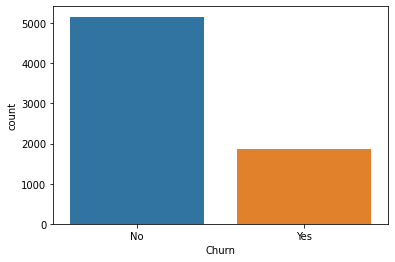

In [86]:
# Check balance of churn column
sns.countplot(data=df, x='Churn');

In [87]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

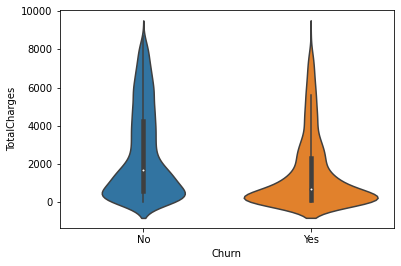

In [88]:
sns.violinplot(data=df, x='Churn', y='TotalCharges')

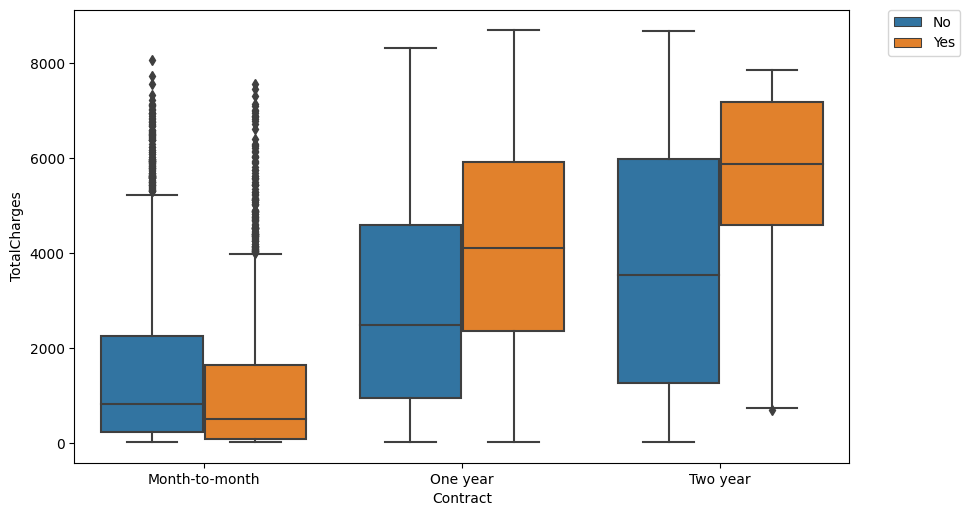

In [89]:
plt.figure(figsize=(10,6), dpi=100)
sns.boxplot(data=df, y='TotalCharges', x='Contract', hue='Churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [90]:
dummy_corr = pd. get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]).corr() 

In [91]:
corr_yes = dummy_corr['Churn_Yes'].sort_values().iloc[1:-1]

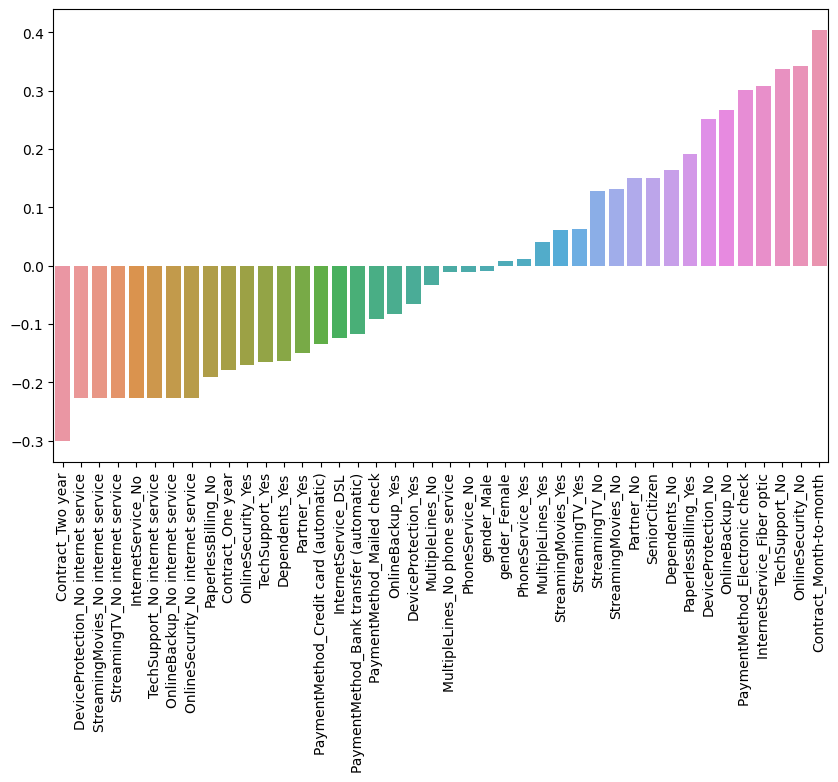

In [92]:
plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(x=corr_yes.index, y=corr_yes.values)
plt.xticks(rotation=90);

In [93]:
# Three types of contract
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

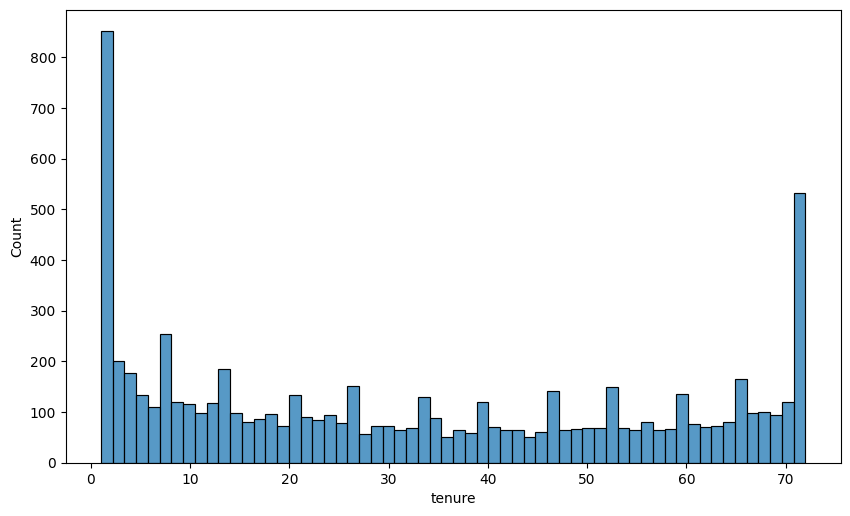

In [94]:
plt.figure(figsize=(10,6), dpi=100)
sns.histplot(data=df, x='tenure', bins=60)

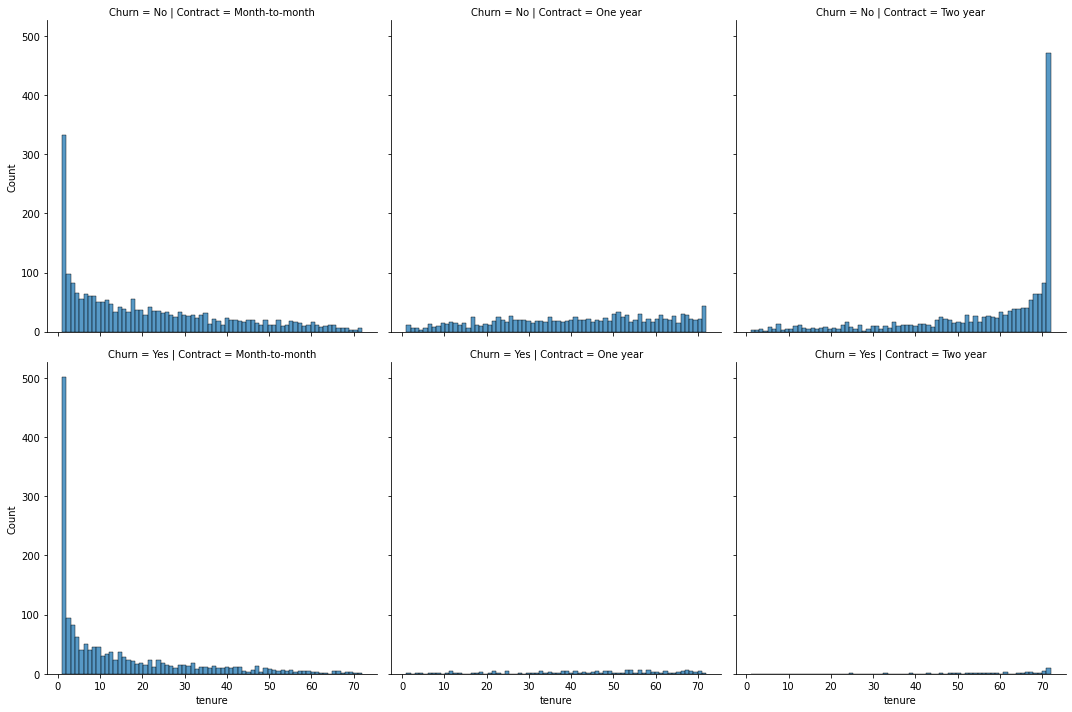

In [95]:
sns.displot(data=df, x='tenure', col='Contract',row='Churn', bins=70)

In [96]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

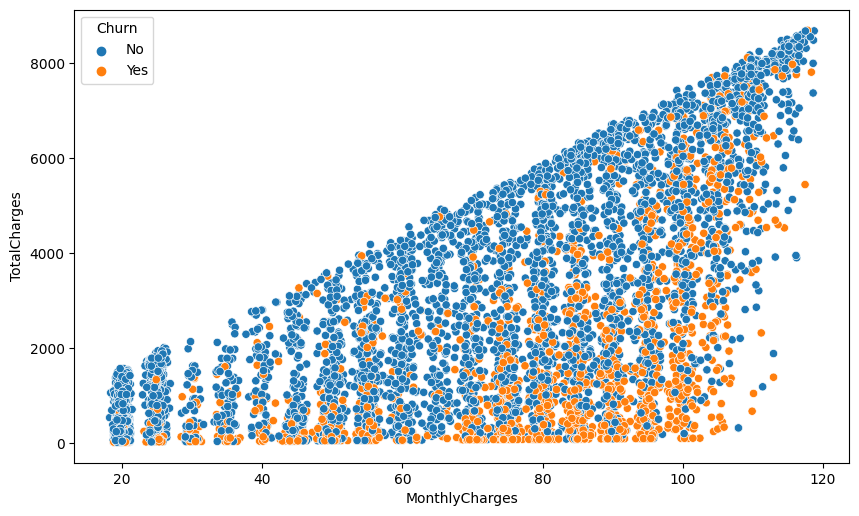

In [97]:
plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

<AxesSubplot:xlabel='tenure'>

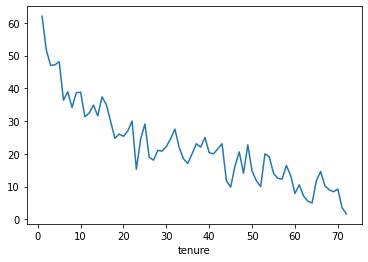

In [98]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']
churn_rate = 100*yes_churn/(no_churn+yes_churn)
churn_rate.transpose()['customerID'].plot()

In [99]:
def tenure_cohorts(tenure):
  if tenure <= 12:
    return '0-12 Months'
  elif 13 <= tenure <= 24:
    return '12-24 Months'
  elif 25 <= tenure <= 48:
    return '24-48 Months'
  else:
    return 'Over 48 Months'

In [100]:
df['Tenure Cohort'] = df['tenure'].apply(tenure_cohorts)

In [101]:
df['Tenure Cohort']

0          0-12 Months
1         24-48 Months
2          0-12 Months
3         24-48 Months
4          0-12 Months
             ...      
7027      12-24 Months
7028    Over 48 Months
7029       0-12 Months
7030       0-12 Months
7031    Over 48 Months
Name: Tenure Cohort, Length: 7032, dtype: object

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

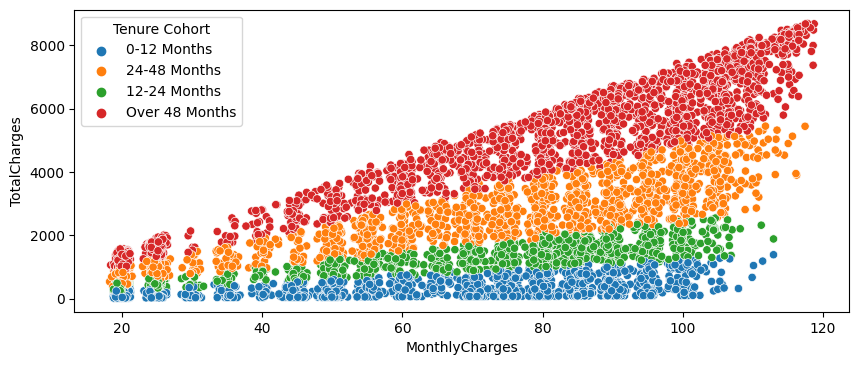

In [102]:
plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort')

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

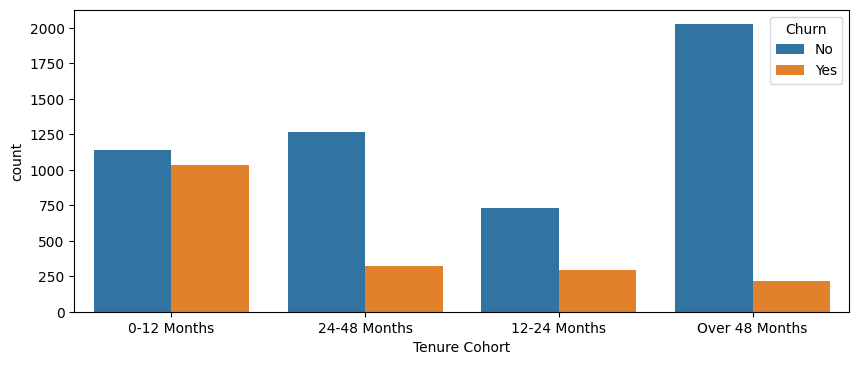

In [103]:
plt.figure(figsize=(10,4), dpi=100)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

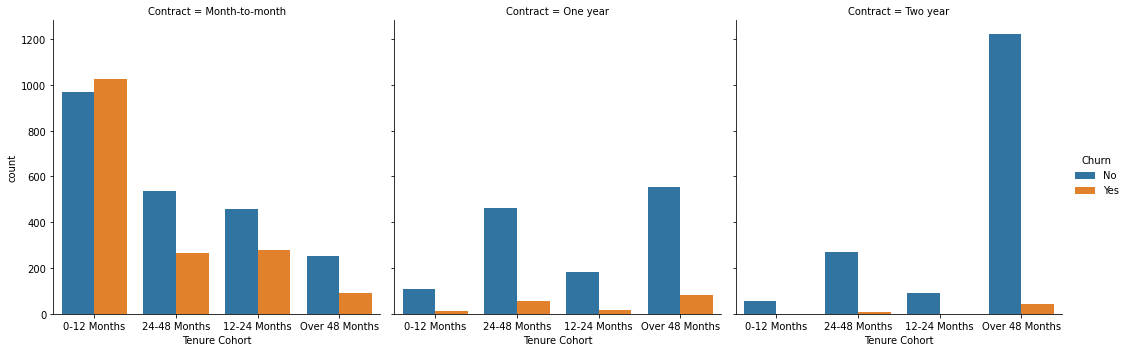

In [104]:
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', kind='count',
            col='Contract')

In [135]:
# Models
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
model = DecisionTreeClassifier(max_depth=6)

In [140]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [141]:
base_pred = model.predict(X_test)

In [142]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

In [143]:
cm = confusion_matrix(y_test,base_pred)
cm

array([[498,  59],
       [ 75,  72]], dtype=int64)

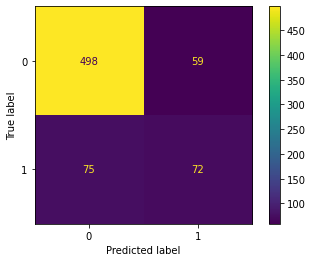

In [145]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [146]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



In [147]:
coef = model.feature_importances_

In [148]:
coef

array([0.01082504, 0.42391407, 0.0441482 , 0.06613492, 0.00123697,
       0.        , 0.        , 0.00696195, 0.00088963, 0.01243191,
       0.31406016, 0.02628952, 0.        , 0.00837585, 0.        ,
       0.00534132, 0.        , 0.        , 0.        , 0.00786752,
       0.        , 0.        , 0.        , 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        , 0.        ])

In [149]:
coefs = pd.DataFrame(data=coef, index=X.columns, columns=['Feat Imp'])

In [150]:
coefs = coefs.sort_values('Feat Imp')

In [151]:
coefs

,Feat Imp
DeviceProtection_No internet service,0.000000
Tenure Cohort_12-24 Months,0.000000
PaymentMethod_Mailed check,0.000000
PaymentMethod_Credit card (automatic),0.000000
PaperlessBilling_Yes,0.000000
StreamingMovies_Yes,0.000000
StreamingMovies_No internet service,0.000000
StreamingTV_Yes,0.000000
StreamingTV_No internet service,0.000000
TechSupport_No internet service,0.000000


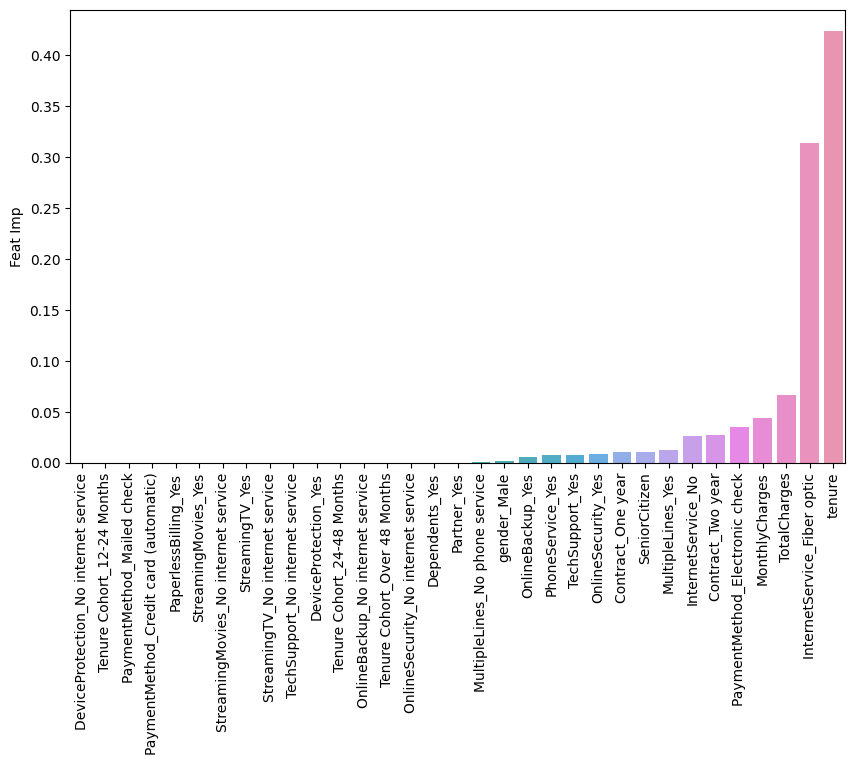

In [152]:
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(data=coefs, x=coefs.index, y='Feat Imp')
plt.xticks(rotation=90);

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
rdm_model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [159]:
rdm_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [160]:
rdm_preds = rdm_model.predict(X_test)

In [161]:
# Eval
confusion_matrix(y_test,rdm_preds)

array([[500,  57],
       [ 86,  61]], dtype=int64)

In [162]:
print(classification_report(y_test,rdm_preds))

              precision    recall  f1-score   support

          No       0.85      0.90      0.87       557
         Yes       0.52      0.41      0.46       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.78      0.80      0.79       704



In [163]:
from sklearn.ensemble import AdaBoostClassifier

In [174]:

ada_model = AdaBoostClassifier()

In [175]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [176]:
ada_preds = ada_model.predict(X_test)

In [177]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [172]:
cm = confusion_matrix(y_test,ada_preds)

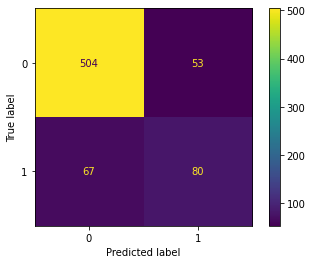

In [173]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()